## Step 1: Reading and Understanding Data

In [113]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
bike.shape

(730, 16)

In [117]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [118]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Mapping the categories according to the Data Dictionary

In [119]:
# Mapping the 'season' column
bike['season'] = bike['season'].map({1 : 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [120]:
# Mapping the 'weatherist' column
bike['weathersit'] = bike['weathersit'].map({1: 'Clear, Partly cloudy',
                                            2: 'Mist, Mist + Cloudy',
                                            3: 'Light Snow, Light Rain',
                                            4: 'Heavy Rain + Ice Pallets'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [121]:
# Mapping the 'weekday' column
bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                      4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [122]:
# Mapping the 'mnth' column
bike['mnth'] = bike['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                7: 'July', 8: 'August', 9: 'September', 10: 'October',
                                11: 'November', 12: 'December'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednesday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
# Mapping the 'yr' column
bike['yr'] = bike['yr'].map({0: '2018', 1: '2019'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,Saturday,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,Sunday,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,Monday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,Tuesday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,Wednesday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [124]:
# Mapping the binary columns as 'yes' or 'no'
bike[['holiday', 'workingday']] = bike[['holiday', 'workingday']].apply(lambda x: x.map({0: 'no', 1: 'yes'}))
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,no,Saturday,no,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,no,Sunday,no,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,no,Monday,yes,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,no,Tuesday,yes,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,no,Wednesday,yes,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
# Dropping the non-relevant columns
bike.drop(columns = ['instant', 'dteday', 'casual', 'registered'], inplace = True)

In [126]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


## Step 2: Visualizing the data

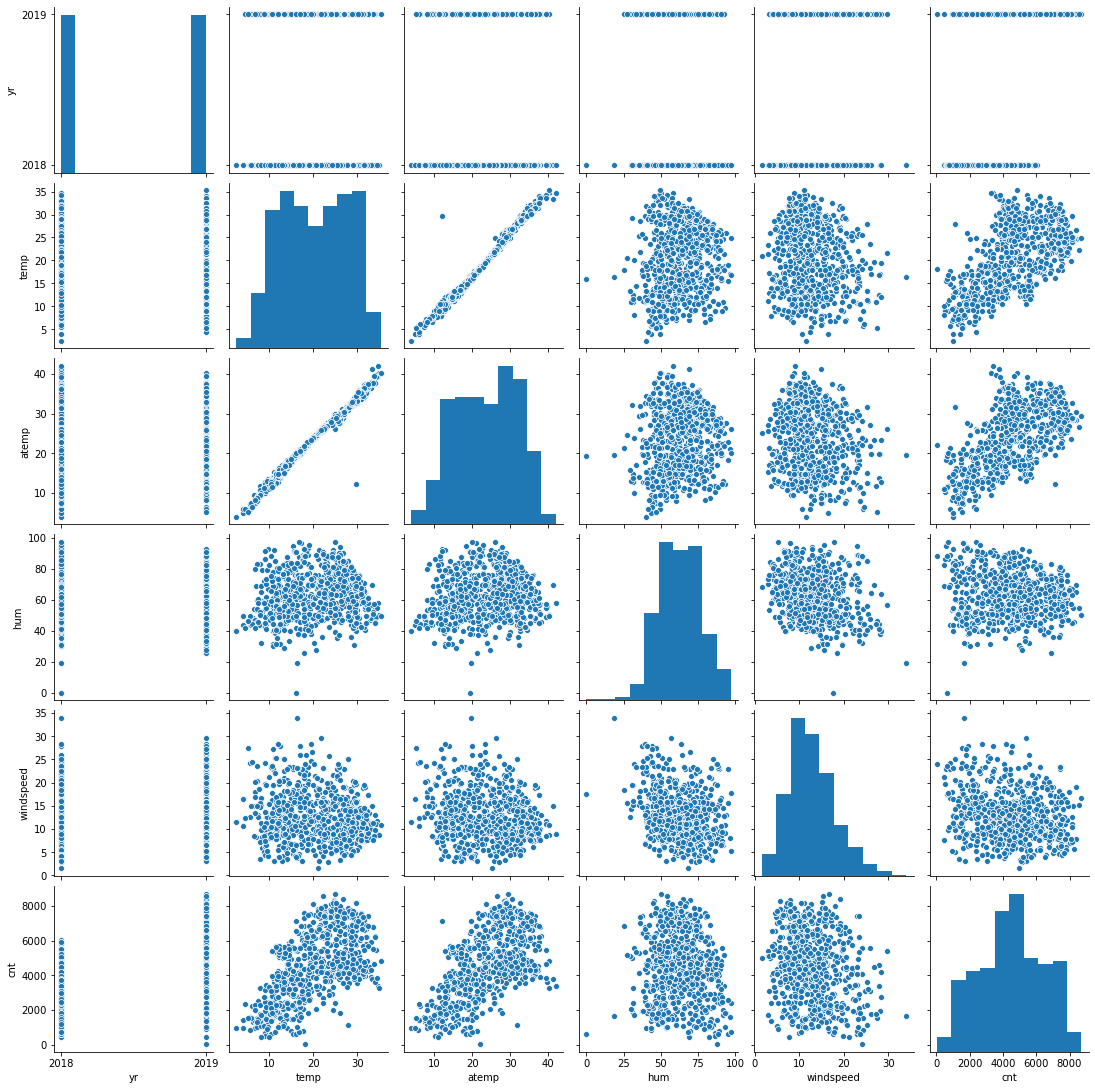

In [127]:
# Visualising the numeric variables
sns.pairplot(bike)
plt.show()

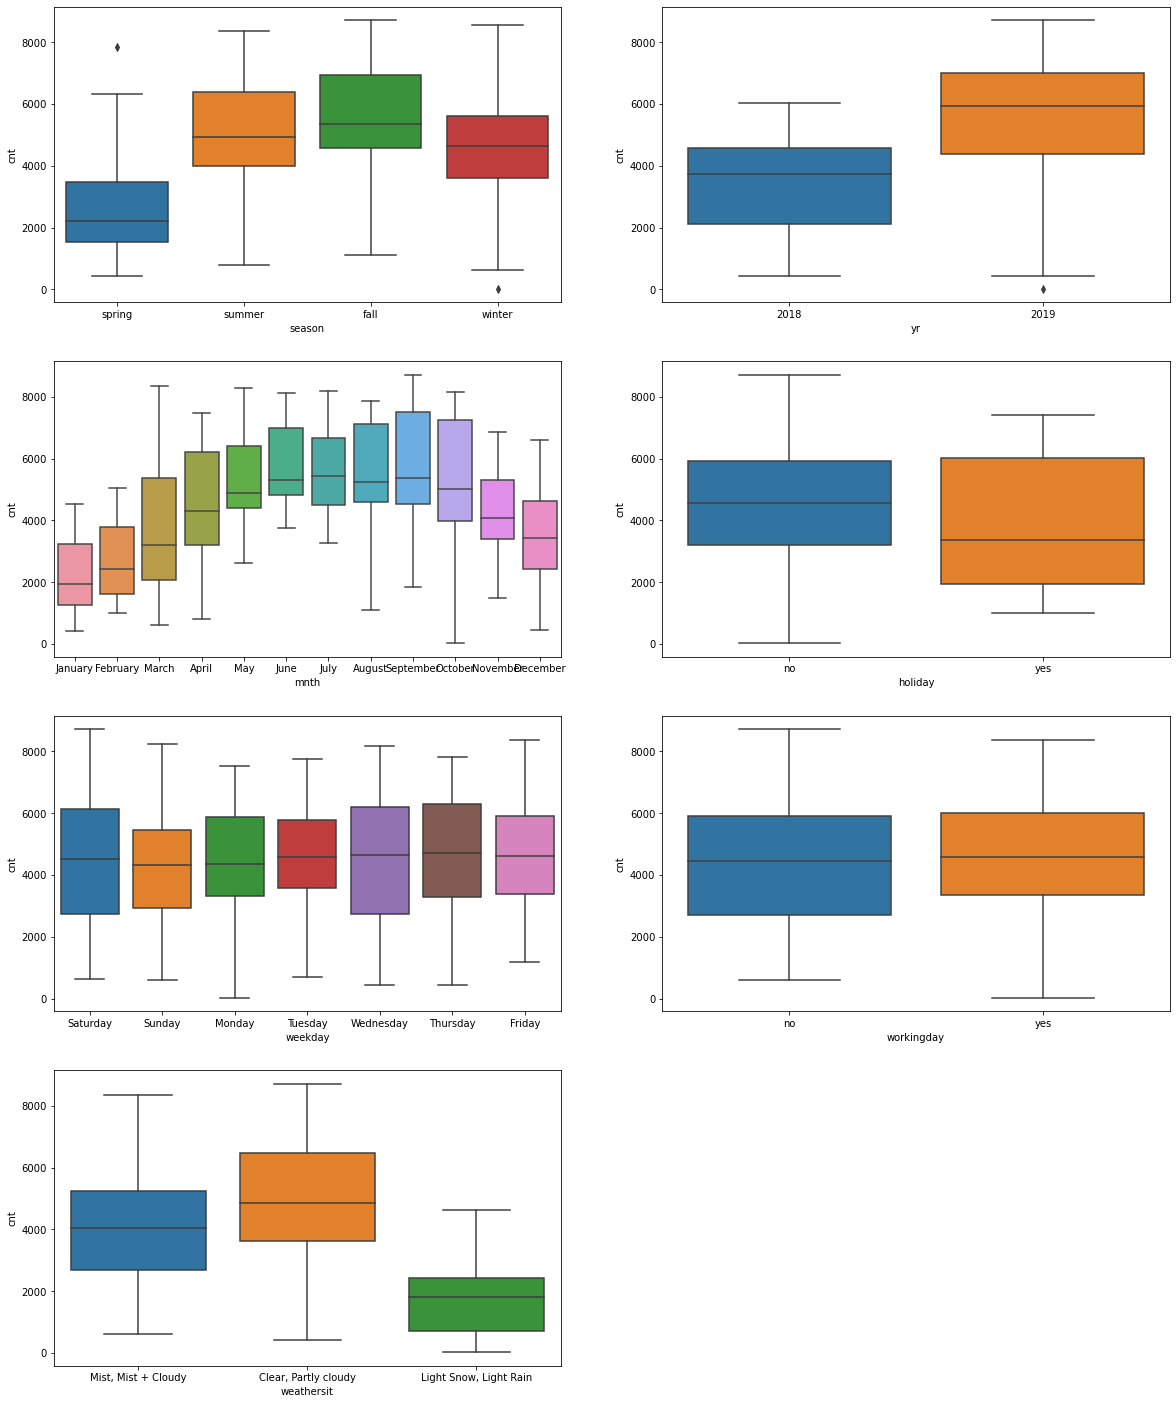

In [128]:
# Extracting the categorical columns
non_num_cols = bike.select_dtypes(include = 'object')

# Visualising the categorical variables
plt.figure(figsize=(20, 25))
subplot_index = 1
for col in list(non_num_cols.columns):
    plt.subplot(4, 2, subplot_index)
    sns.boxplot(x=col, y='cnt', data=bike)
    subplot_index += 1
plt.show()  

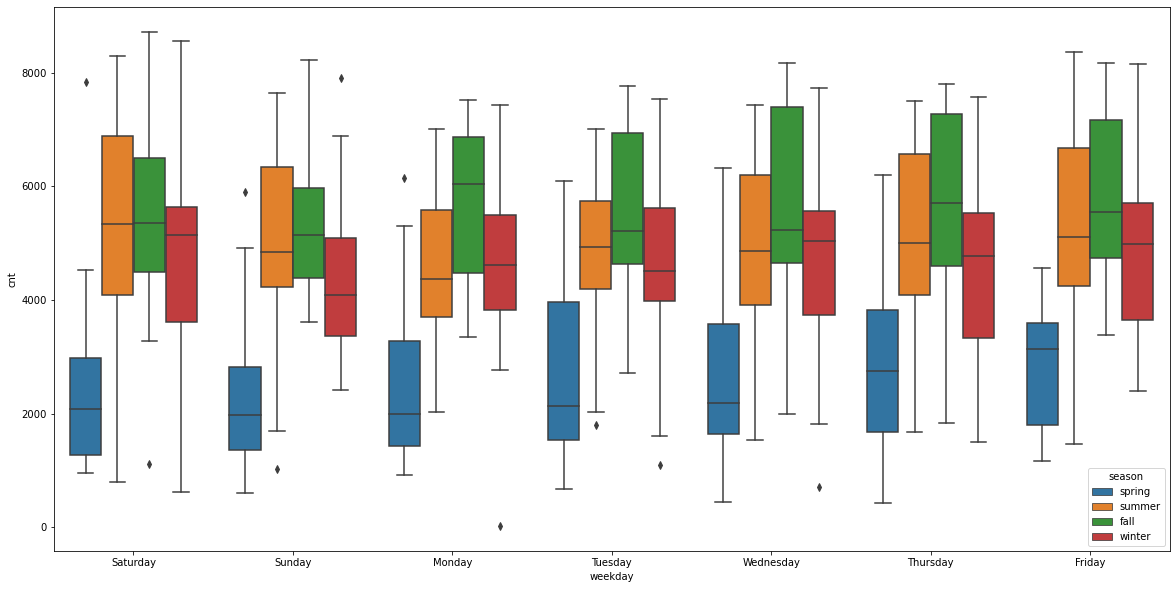

In [129]:
# Plotting the distribution of total bookings for each weekday of a particular season
plt.figure(figsize=(20, 10))
sns.boxplot(x='weekday', y='cnt', hue='season', data=bike)
plt.show()

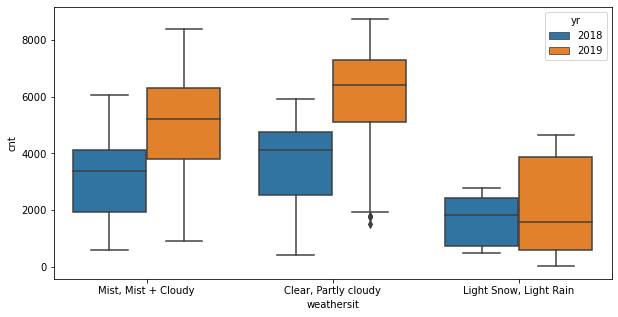

In [130]:
# plotting the distribution of total bookings for different weather conditions of each year
plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', hue='yr', data=bike)
plt.show()

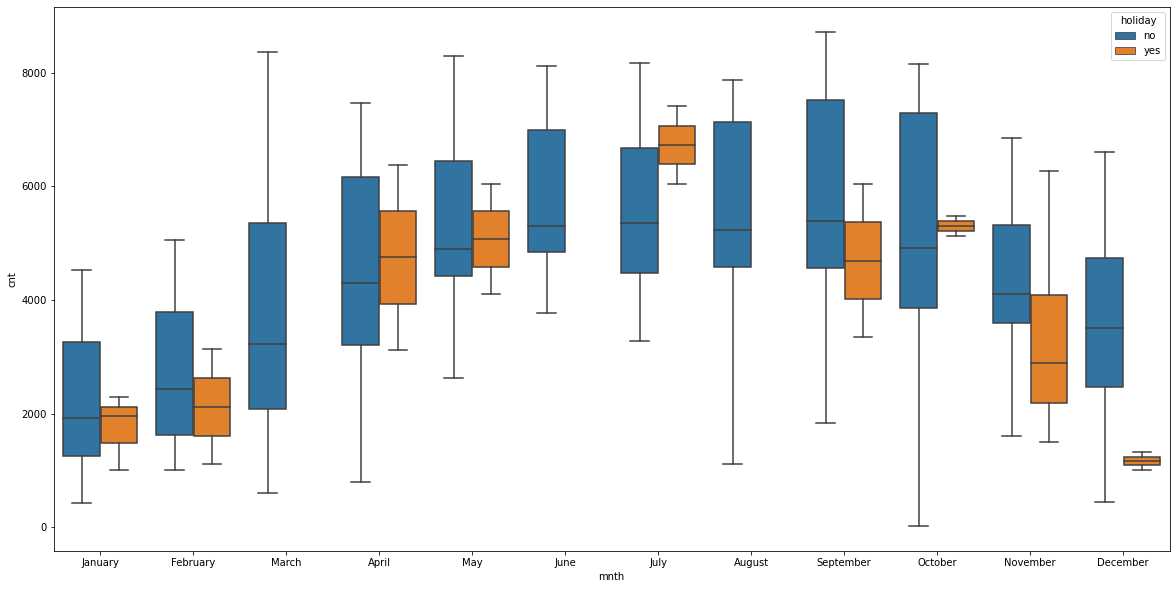

In [131]:
# plotting the distribution of total bookings for holiday's in each month
plt.figure(figsize=(20, 10))
sns.boxplot(x='mnth', y='cnt', hue='holiday', data=bike)
plt.show()

## Step 3: Data Preparation

In [132]:
# Converting the 'yr' column to its original form
bike['yr'] = bike['yr'].map({'2018': 0, '2019': 1})

# Converting the binary columns back to their original form
bike[['holiday', 'workingday']] = bike[['holiday', 'workingday']].apply(lambda x: x.map({'no': 0, 'yes': 1}))
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [133]:
# Creating dummy variables for categorical variables
dummy_cols = ['season', 'mnth', 'weekday', 'weathersit']
for col in dummy_cols:
    status = pd.get_dummies(bike[col], drop_first=True)
    bike = pd.concat([bike, status], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist, Mist + Cloudy"
0,spring,0,January,0,Saturday,0,"Mist, Mist + Cloudy",14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,"Mist, Mist + Cloudy",14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,"Clear, Partly cloudy",8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,"Clear, Partly cloudy",8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,"Clear, Partly cloudy",9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [134]:
# Dropping the columns from which we have extracted the dummy variables
bike.drop(columns = dummy_cols, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist, Mist + Cloudy"
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Test Sets

In [135]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

### Rescaling the Features

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [137]:
# Applying the Scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist, Mist + Cloudy"
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [138]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist, Mist + Cloudy"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


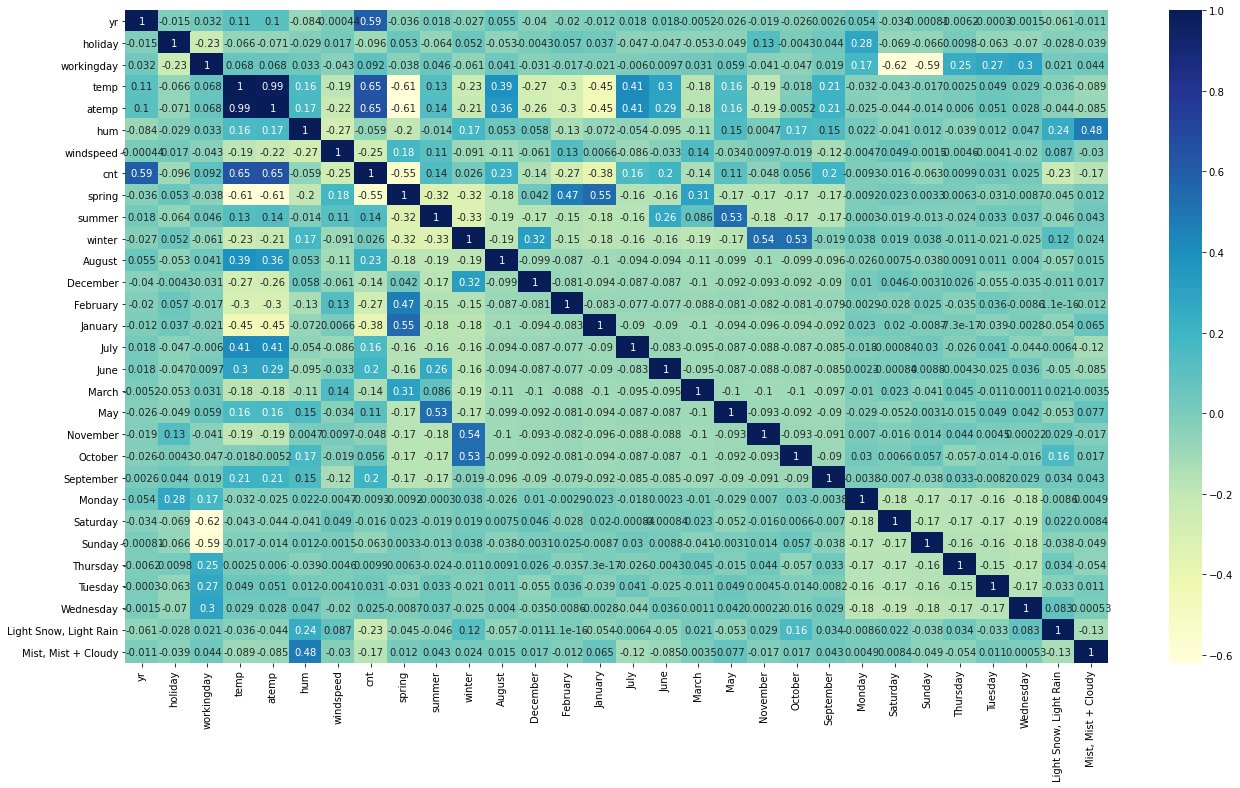

In [139]:
# Plotting the correlations between variables
plt.figure(figsize=(22,12))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for Model Building

In [140]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a Linear Model

### RFE

In [141]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [142]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 12),
 ('December', False, 8),
 ('February', False, 9),
 ('January', False, 6),
 ('July', True, 1),
 ('June', False, 19),
 ('March', False, 20),
 ('May', False, 11),
 ('November', False, 7),
 ('October', False, 18),
 ('September', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 4),
 ('Sunday', False, 13),
 ('Thursday', False, 16),
 ('Tuesday', False, 15),
 ('Wednesday', False, 17),
 ('Light Snow, Light Rain', True, 1),
 ('Mist, Mist + Cloudy', False, 3)]

In [144]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'July',
       'September', 'Light Snow, Light Rain'],
      dtype='object')

In [145]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'spring', 'August', 'December', 'February',
       'January', 'June', 'March', 'May', 'November', 'October', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Mist, Mist + Cloudy'],
      dtype='object')

### Building model using statsmodels, for the detailed statistics

In [146]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [147]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [148]:
# Running the Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [149]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.79e-186
Time:                        23:41:05   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [150]:
# Calculating the VIFs for the model
X_train_vif = X_train_rfe.drop(columns='const')     # Dropping the constant column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
7,July,1.55
8,September,1.29
9,"Light Snow, Light Rain",1.09
1,holiday,1.04


In [151]:
# Dropping 'hum' as it has high VIF
X_train_new = X_train_vif.drop(columns = 'hum')

In [152]:
# Rebuilding the model without column 'hum'

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.42e-171
Time:                        23:41:05   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [153]:
# Calculating the VIFs again for the new model
X_train_vif = X_train_lm.drop(columns='const')     # Dropping the constant column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,summer,1.75
6,July,1.51
5,winter,1.43
7,September,1.28
8,"Light Snow, Light Rain",1.06
1,holiday,1.03


In [154]:
# Dropping 'July' as it is insignificant
X_train_new = X_train_vif.drop(columns = 'July')

In [155]:
# Rebuilding the model without column 'July'

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.22e-172
Time:                        23:41:05   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [156]:
# Calculating the VIFs again for the new model
X_train_vif = X_train_lm.drop(columns='const')     # Dropping the constant column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.34
6,September,1.20
7,"Light Snow, Light Rain",1.06
1,holiday,1.03



The equation of our best fitted line is:

$ cnt = 0.0875 + 0.2334  \times  yr + 0.5682  \times  temp + 0.0812 \times summer + 0.1261 \times winter + 0.0895 \times September - 0.0867 \times holiday - 0.1455 \times windspeed - 0.2535 \times Light Snow, Light Rain $



## Residual Analysis of the train data

In [157]:
y_train_cnt = lm.predict(X_train_lm)

### Distribution of Error Terms

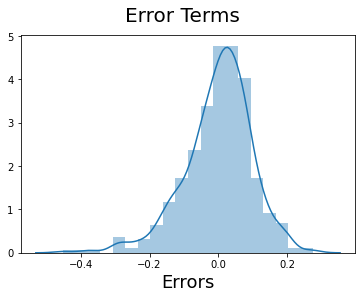

In [158]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Dependancy and Variance of Error Terms

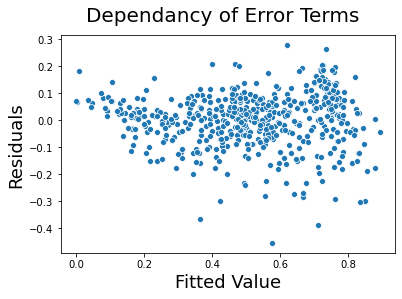

In [159]:
# Checking if the error terms are independent of the predicted values
fig = plt.figure()
sns.scatterplot(y_train_cnt, (y_train - y_train_cnt))
fig.suptitle('Dependancy of Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Fitted Value', fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)
plt.show()

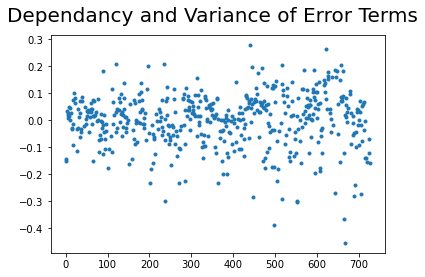

In [160]:
# Checking if the error terms have constant variance
fig = plt.figure()
(y_train - y_train_cnt).plot(style = '.')
fig.suptitle('Dependancy and Variance of Error Terms', fontsize = 20)                  # Plot heading 
plt.show()

## Making Predictions Using the Final Model

In [161]:
# Appying the scaling on the test set
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [162]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [163]:
# Using our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [164]:
# Making Predictions of Test Set
y_pred = lm.predict(X_test_new)

## Model Evaluation

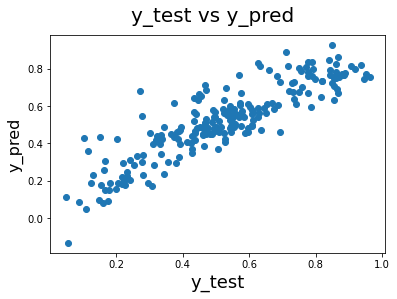

In [165]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Calculating R-squared score on Test Set

In [166]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7720731949554799